In [24]:
%%html
<style type='text/css'>
.CodeMirror{
font-size: 22px;
</style>

In [25]:
%reload_ext autoreload
%autoreload 2

In [26]:
import matplotlib.pyplot as plt
import numpy as np

color_dict_compare = {
    'our': 'forestgreen', 
    'ref': '#2980b9', 
    'compare1': '#F3B234', 
    'compare2': '#DB8647', 
    'compare3': '#CA443B'
}
#8D9D81
# mark_dict_compare = {'our':'.', 'compare1': '^', 'compare2':'+', 'compare3':'D'}
color_dict_compare_deep = {
    'ref': '#0b4070',         # dark blue
    'our': '#0d6e3f',         # dark green
    'compare1': '#b3740d',    # dark orange
    'compare2': '#a63e1e',    # dark red
    'compare3': '#84342a',    # dark brown
    'compare4': '#2b2b2b',    # dark gray
    'compare5': '#990099',    # dark purple
    'compare6': '#7e7e7e',    # dark silver
    'compare7': '#800000'     # dark maroon
}


color_dict_single = {'error': '#2980b9', 'para': '#d35400'}

In [95]:
w_types = ['ref', 'sin', 'random']
linear_mean = []
linear_std = []
hybrid1_mean = []
hybrid1_std = []
hybrid2_mean = []
hybrid2_std = []
bilinear_mean = []
bilinear_std = []
bilinear_mean_del = []
bilinear_std_del = []
for i in range(3):
    w_type = w_types[i]
    time_log_linear = np.load(f'./linear_data/time_log_{w_type}_0.npy')
    time_log_bilinear = np.load(f'./bilinear_data/time_log_{w_type}_0.npy')
    time_log_hybrid1 = np.load(f'./hybrid_data_1/time_log_{w_type}_0.npy')
    time_log_hybrid2 = np.load(f'./hybrid_data_2/time_log_{w_type}_0.npy')
    time_log_bilinear_del = np.delete(time_log_bilinear, [5, 8])
    linear_mean.append(np.mean(time_log_linear))
    linear_std.append(np.std(time_log_linear))
    hybrid1_mean.append(np.mean(time_log_hybrid1))
    hybrid1_std.append(np.std(time_log_hybrid1))
    hybrid2_mean.append(np.mean(time_log_hybrid2))
    hybrid2_std.append(np.std(time_log_hybrid2))
    bilinear_mean.append(np.mean(time_log_bilinear))
    bilinear_std.append(np.std(time_log_bilinear))
    bilinear_mean_del.append(np.mean(time_log_bilinear_del))
    bilinear_std_del.append(np.std(time_log_bilinear_del))

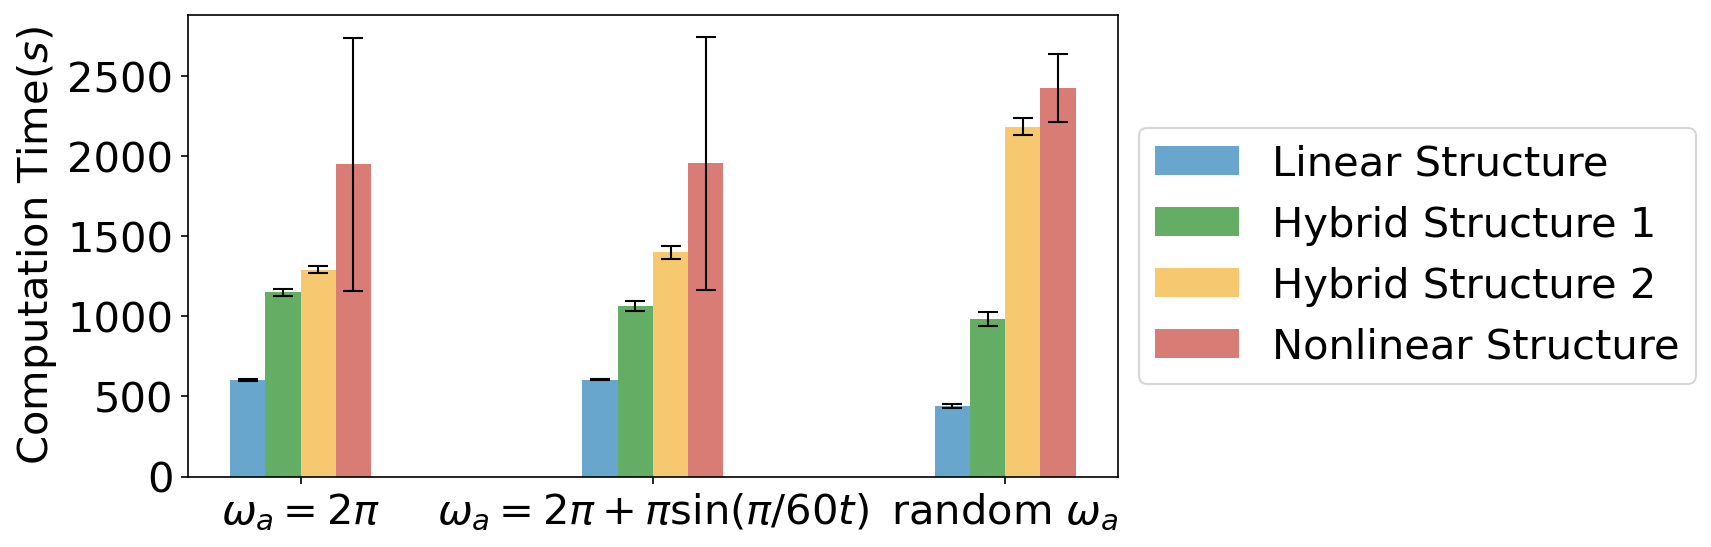

In [114]:
import matplotlib.pyplot as plt
import numpy as np

font_size = 20

categories = ['$\omega_a = 2\pi$', '$\omega_a = 2\pi + \pi \sin(\pi/60 t)$', 'random $\omega_a$']
methods = ['Linear Structure', 'Hybrid Structure 1', 'Hybrid Structure 2', 'Nonlinear Structure']

plt.figure(figsize=(8,4), dpi = 150)

bar_width = 0.1 

x = np.arange(len(categories))

plt.bar(x + bar_width, linear_mean, bar_width, color=color_dict_compare['ref'], label=methods[0], alpha=0.7, yerr=linear_std, error_kw={'capsize': 5, 'elinewidth': 1, 'capthick': 1})
plt.bar(x + 2 * bar_width, hybrid1_mean, bar_width, color=color_dict_compare['our'], label=methods[1], alpha=0.7, yerr=hybrid1_std, error_kw={'capsize': 5, 'elinewidth': 1, 'capthick': 1})
plt.bar(x + 3 * bar_width, hybrid2_mean, bar_width, color=color_dict_compare['compare1'], label=methods[2], alpha=0.7, yerr=hybrid2_std, error_kw={'capsize': 5, 'elinewidth': 1, 'capthick': 1})
plt.bar(x + 4 * bar_width, bilinear_mean, bar_width, color=color_dict_compare['compare3'], label=methods[3], alpha=0.7, yerr=bilinear_std, error_kw={'capsize': 5, 'elinewidth': 1, 'capthick': 1})

plt.ylabel('Computation Time($s$)', fontsize=font_size)

plt.legend(loc='upper left', bbox_to_anchor=(1, 0.8), fontsize=font_size)

plt.xticks(x + 2.5 * bar_width, categories, fontsize=font_size)

plt.yticks(fontsize=font_size)

plt.show()

In [101]:
import os

def calculte_tracking_error(suffix, test_folder_path, result_folder_path):
    s_des_test = np.load(os.path.join(test_folder_path, f's_des_test_{suffix}.npy'))
    s_traj_ref = np.load(os.path.join(result_folder_path, f's_traj_ref_{suffix}.npy'))
    s_traj_sin = np.load(os.path.join(result_folder_path, f's_traj_sin_{suffix}.npy'))
    s_traj_random = np.load(os.path.join(result_folder_path, f's_traj_random_{suffix}.npy'))
    
    mse = np.zeros(3)
    max_abs_diff = np.zeros(3)
    
    mse[0] = 1/2 * (
        np.linalg.norm(s_traj_ref[:, 0, 3] - s_des_test[:176, 3])/np.linalg.norm(s_des_test[:176, 3])
        + np.linalg.norm(s_traj_ref[:, 0, 5] - s_des_test[:176, 5])/np.linalg.norm(s_des_test[:176, 5]))
    
    mse[1] = 1/2 * (
        np.linalg.norm(s_traj_sin[:, 0, 3] - s_des_test[:176, 3])/np.linalg.norm(s_des_test[:176, 3])
        + np.linalg.norm(s_traj_sin[:, 0, 5] - s_des_test[:176, 5])/np.linalg.norm(s_des_test[:176, 5]))
    
    mse[2] = 1/2 * (
        np.linalg.norm(s_traj_random[:, 0, 3] - s_des_test[:176, 3])/np.linalg.norm(s_des_test[:176, 3])
        + np.linalg.norm(s_traj_random[:, 0, 5] - s_des_test[:176, 5])/np.linalg.norm(s_des_test[:176, 5]))
    
    max_abs_diff[0] = 1/2 * (
        np.max(np.abs(s_traj_ref[:, 0, 3] - s_des_test[:176, 3]))/np.max(np.abs(s_des_test[:176, 3]))
        + np.max(np.abs(s_traj_ref[:, 0, 5] - s_des_test[:176, 5]))/np.max(np.abs(s_des_test[:176, 3]))
    )
        
    max_abs_diff[1] = 1/2 * (
        np.max(np.abs(s_traj_sin[:, 0, 3] - s_des_test[:176, 3]))/np.max(np.abs(s_des_test[:176, 3]))
        + np.max(np.abs(s_traj_sin[:, 0, 5] - s_des_test[:176, 5]))/np.max(np.abs(s_des_test[:176, 3]))
    )
    
    max_abs_diff[2] = 1/2 * (
        np.max(np.abs(s_traj_random[:, 0, 3] - s_des_test[:176, 3]))/np.max(np.abs(s_des_test[:176, 3]))
        + np.max(np.abs(s_traj_random[:, 0, 5] - s_des_test[:176, 5]))/np.max(np.abs(s_des_test[:176, 3]))
    )

    return mse, max_abs_diff

In [102]:
mse_linear = []
max_abs_diff_linear = []
mse_hybrid1 = []
max_abs_diff_hybrid1 = []
mse_hybrid2 = []
max_abs_diff_hybrid2 = []
mse_bilinear = []
max_abs_diff_bilinear = []

result_folder_path_set = ['linear_data/', 'hybrid_data_1/', 'hybrid_data_2/', 'bilinear_data/']
test_folder_path = 'test_data_sin/'

for suffix in range(1, 10):
    mse, max_abs_diff = calculte_tracking_error(suffix, test_folder_path, 'linear_data/')
    mse_linear.append(mse)
    max_abs_diff_linear.append(max_abs_diff)
    mse, max_abs_diff = calculte_tracking_error(suffix, test_folder_path, 'hybrid_data_1/')
    mse_hybrid1.append(mse)
    max_abs_diff_hybrid1.append(max_abs_diff)
    mse, max_abs_diff = calculte_tracking_error(suffix, test_folder_path, 'hybrid_data_2/')
    mse_hybrid2.append(mse)
    max_abs_diff_hybrid2.append(max_abs_diff)
    mse, max_abs_diff = calculte_tracking_error(suffix, test_folder_path, 'bilinear_data/')
    mse_bilinear.append(mse)
    max_abs_diff_bilinear.append(max_abs_diff)

In [104]:
max_abs_diff_bilinear_del = np.delete(max_abs_diff_bilinear, [5, 8], axis=0)
max_abs_diff_bilinear_del

array([[0.37127906, 0.37127906, 0.46105487],
       [1.16773878, 1.16773878, 1.0655112 ],
       [0.66341804, 0.66341804, 1.42366934],
       [0.5076325 , 0.5076325 , 1.1841465 ],
       [0.40606558, 0.40606558, 1.42635685],
       [0.19822916, 0.19822916, 0.80223195],
       [0.42857539, 0.42857539, 1.77058124]])

In [105]:
mean_linear_error = np.mean(np.array(max_abs_diff_linear), axis = 0)
std_linear_error = np.std(np.array(max_abs_diff_linear), axis = 0)
mean_hybrid1_error = np.mean(np.array(max_abs_diff_hybrid1), axis = 0)
std_hybrid1_error = np.std(np.array(max_abs_diff_hybrid1), axis = 0)
mean_hybrid2_error = np.mean(np.array(max_abs_diff_hybrid2), axis = 0)
std_hybrid2_error = np.std(np.array(max_abs_diff_hybrid2), axis = 0)
mean_bilinear_error = np.mean(np.array(max_abs_diff_bilinear), axis = 0)
std_bilinear_error = np.std(np.array(max_abs_diff_bilinear), axis = 0)
mean_bilinear_del_error = np.mean(np.array(max_abs_diff_bilinear_del), axis = 0)
std_bilinear_del_error = np.std(np.array(max_abs_diff_bilinear_del), axis = 0)

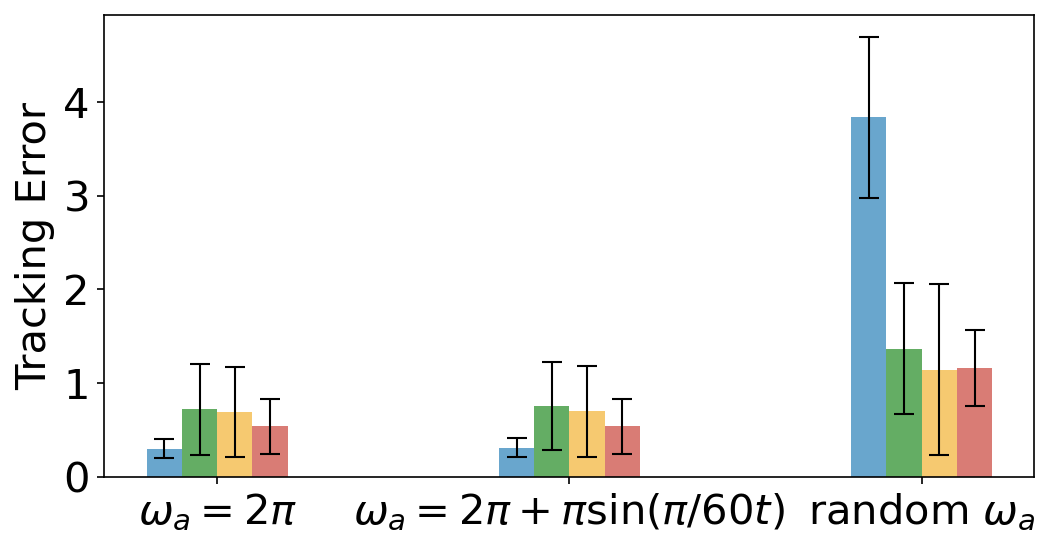

In [122]:
import matplotlib.pyplot as plt
import numpy as np

font_size = 20

categories = ['$\omega_a = 2\pi$', '$\omega_a = 2\pi + \pi \sin(\pi/60 t)$', 'random $\omega_a$']
methods = ['Linear Structure', 'Hybrid Structure 1', 'Hybrid Structure 2', 'Nonlinear Structure']

plt.figure(figsize=(8,4), dpi = 150)

bar_width = 0.1 

x = np.arange(len(categories))

plt.bar(x + bar_width, mean_linear_error, bar_width, color=color_dict_compare['ref'], label=methods[0], alpha=0.7, yerr=std_linear_error, error_kw={'capsize': 5, 'elinewidth': 1, 'capthick': 1})
plt.bar(x + 2 * bar_width, mean_hybrid1_error, bar_width, color=color_dict_compare['our'], label=methods[1], alpha=0.7, yerr=std_hybrid1_error, error_kw={'capsize': 5, 'elinewidth': 1, 'capthick': 1})
plt.bar(x + 3 * bar_width, mean_hybrid2_error, bar_width, color=color_dict_compare['compare1'], label=methods[2], alpha=0.7, yerr=std_hybrid2_error, error_kw={'capsize': 5, 'elinewidth': 1, 'capthick': 1})
plt.bar(x + 4 * bar_width, mean_bilinear_del_error, bar_width, color=color_dict_compare['compare3'], label=methods[3], alpha=0.7, yerr=std_bilinear_del_error, error_kw={'capsize': 5, 'elinewidth': 1, 'capthick': 1})

plt.ylabel('Tracking Error', fontsize=font_size)
plt.ylim(0, None)
# plt.legend(loc='upper left', bbox_to_anchor=(1, 0.8), fontsize=font_size)

plt.xticks(x + 2.5 * bar_width, categories, fontsize=font_size)

plt.yticks(fontsize=font_size)

plt.show()